# Machine Learning I - Practical I

Course: M.Sc. Applied Computer Science

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [3]:
data = pd.read_csv('data/superconduct_train.csv')
print(data.shape)

(21263, 82)


In [4]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed.

In [5]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [6]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatterplots** relating the target variable to one of the feature values. For this you will need 81 scatterplots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

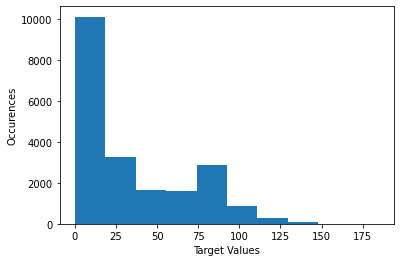

In [7]:
# Histogram of the target variable
plt.hist(y_train_full)
plt.xlabel("Target Values")
plt.ylabel("Occurences")
plt.show()

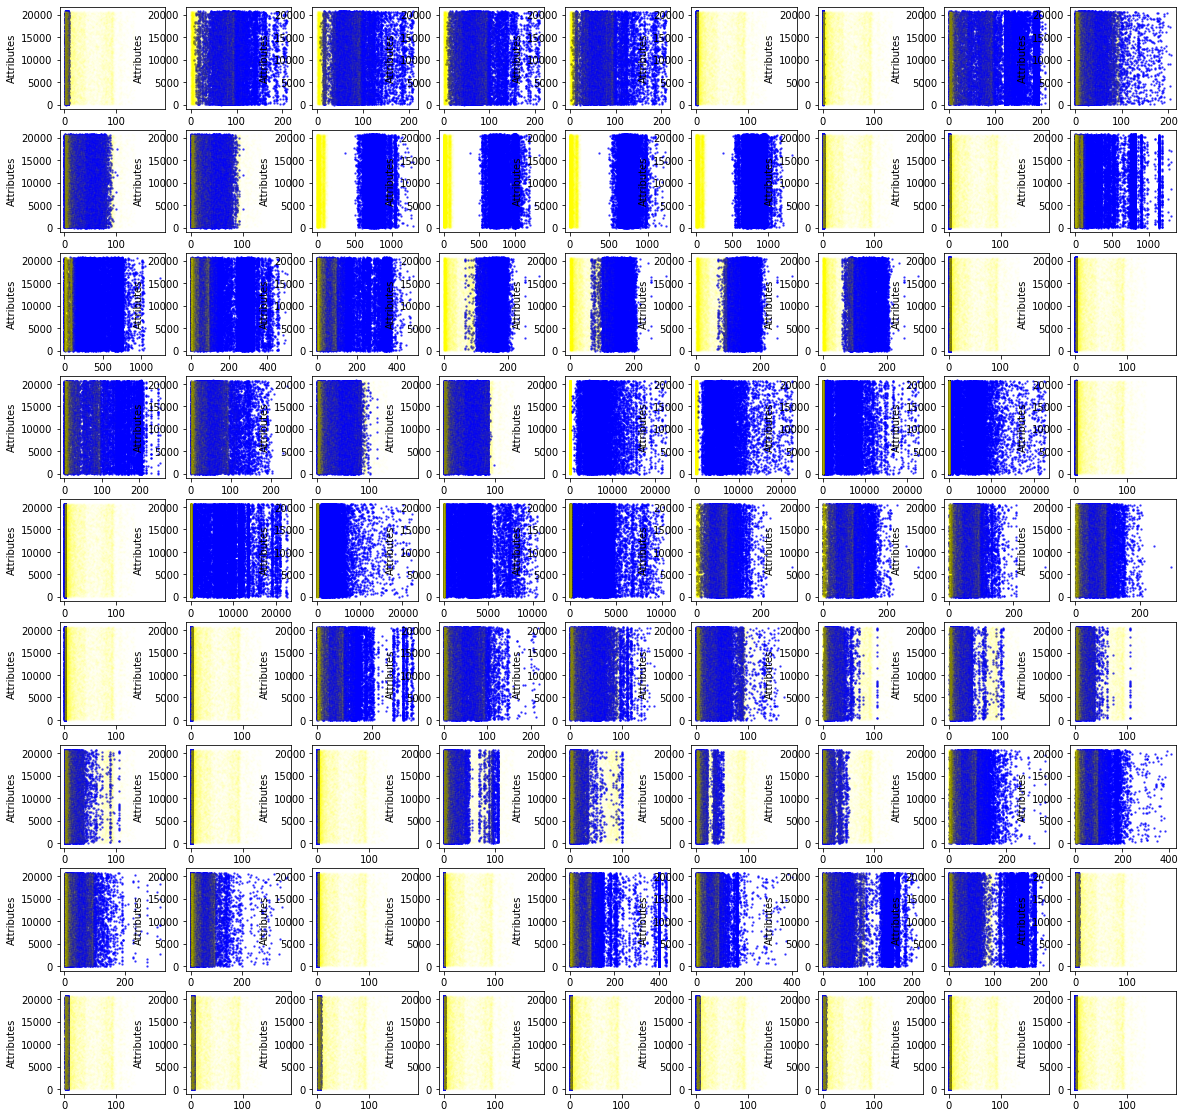

In [8]:
# Scatter plots of the target variable vs. features
figure, axes = plt.subplots(nrows=9, ncols=9, figsize=(20,20))
k=0
for i in range(9):
    for j in range(9):
        axes[i,j].scatter(X_train_full[:,k],np.arange(1,20764),c="blue",alpha=0.6,s=2)
        axes[i,j].scatter(y_train_full,np.arange(1,20764),c="yellow",alpha=0.01,s=2)
        axes[i,j].set_ylabel('Attributes')
        k+=1

In [18]:
def Normalize(feature):
    m=np.mean(feature, axis=0)
    d=np.std(feature, axis=0)
    feature=(feature-m)/d
    return feature    

In [19]:
for i in range(5):
    print(i+1,"\t",Normalize(X_train_full[:,i]).mean(axis=0),"\t",Normalize(X_train_full[:,i]).std(axis=0))

1 	 -2.0464506862425464e-16 	 0.9999999999999998
2 	 -2.8198584706753485e-16 	 1.0
3 	 1.1430008849582116e-16 	 1.0
4 	 1.8274325525978592e-16 	 1.0
5 	 -1.6426360023351542e-17 	 1.0


Which material properties may be useful for predicting superconductivity? What other observations can you make?

From the above subplots it can be inferred that properties 22,23,24,25 are more useful than others for predicting the superconductivity due to their similar distribution to the target over the plot.

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [12]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  2640.432578444892
r^2:  -1.108062856115481


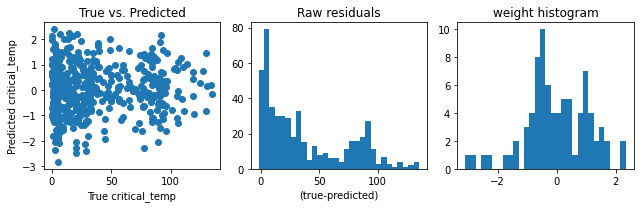

In [50]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_test = np.random.randn(y_test.size)

plot_regression_results(y_test, y_pred_test, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regession result, you should get mean squared error of 707.8.

In [20]:
def OLS_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
#     X_train = normalize(X_train,X_train)
#     X_test = normalize(X_test,X_train)
    X_train = Normalize(X_train)
    X_test = Normalize(X_test)
    bias = np.ones(shape=(len(X_train),1))
    X_train_new = np.append(bias, X_train, axis=1)
    bias = np.ones(shape=(len(X_test),1))
    X_test_new = np.append(bias, X_test, axis=1)
    
    
    xtx = (X_train_new.transpose().dot(X_train_new))
    weights = np.linalg.inv(xtx).dot(X_train_new.transpose()).dot(y_train)
    print(weights.shape)
    y_pred = X_test_new.dot(weights) 

    
    # ---------------- END CODE -------------------------
    
        
    return weights, y_pred

(82, 1)
MSE:  707.8008845115141
r^2:  0.4349074593515332


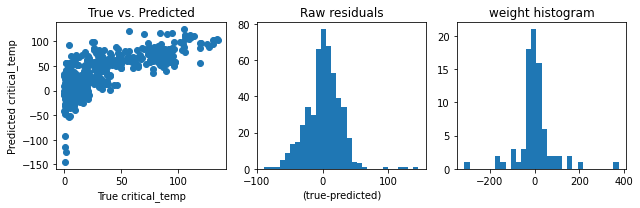

In [21]:
# Plots of the results
weights, y_pred = OLS_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?

The model is accurate in more than 52% cases whereas in the remaining cases it can be observed that predicted critical temperature lies below zero but there are almost no negative data points for true critical temperature in dataset. 

## Task 3: Compare your implementation to sklearn

Now, familarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [22]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    X_train = Normalize(X_train)
    X_test = Normalize(X_test)
    reg = LinearRegression().fit(X_train, y_train)
    weights=reg.coef_
    y_pred=reg.predict(np.array(X_test))
    # ---------------- END CODE -------------------------

    return weights, y_pred

In [23]:
from sklearn.linear_model import LinearRegression
# xtx = (X_train.transpose().dot(X_train))
# weights = np.linalg.inv(xtx).dot(X_train.transpose()).dot(y_train)
# y = np.dot(X_train, weights) + 1
# print(y.shape)


MSE:  707.8008845059965
r^2:  0.43490745935593833


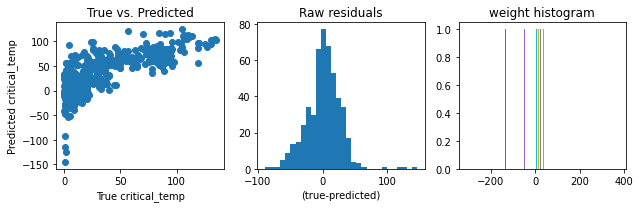

In [24]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  340.8728213881182
r^2:  0.7278546934719332


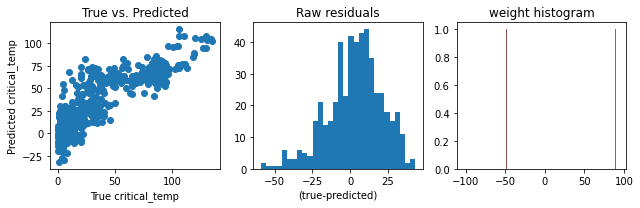

In [25]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

The perfomance became better with full dataset as MSE for the model decreased as compared to prediction on the corresponding test dataset.

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [26]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    X_train = Normalize(X_train)
    X_test = Normalize(X_test)
    bias = np.ones(shape=(len(X_train),1))
    X_train_new = np.append(bias, X_train, axis=1)
#     X_train_new = normalize(X_train_new, X_train_new)
    bias = np.ones(shape=(len(X_test),1))
    X_test_new = np.append(bias, X_test, axis=1)
#     X_test_new = normalize(X_test_new, X_train_new)
    
    xtx = X_train_new.transpose().dot(X_train_new)
    xtx = xtx + alpha*np.identity(xtx.shape[0])
    weights = np.linalg.inv(xtx).dot(X_train_new.transpose()).dot(y_train)
    
    y_pred = X_test_new.dot(weights) + 1

    # ---------------- END CODE -------------------------

    return weights, y_pred

In [27]:
bias = np.ones(shape=(len(X_train),1))
X_train_new = np.append(bias, X_train, axis=1)
bias = np.ones(shape=(len(X_test),1))
X_test_new = np.append(bias, X_test, axis=1)
k = X_train_new.transpose().dot(X_train_new)
print(X_train_new.shape, X_train_new.transpose().shape[0])

(200, 82) 82


Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  423.0446353012447
r^2:  0.6622505382497929


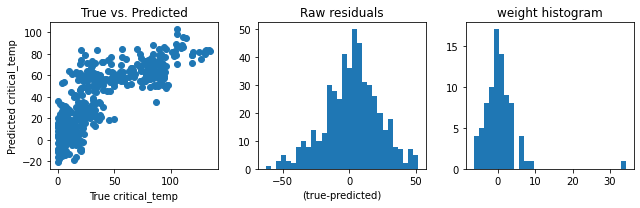

In [28]:
# Run ridge regression with alpha=10
weights, y_pred = ridge_regression(X_test, X_train, y_train, 10)

# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha$s (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [29]:
alphas = np.logspace(-7, 7, 100)
alpha_weights=[]
alpha_mse=[]
# ---------------- INSERT CODE ----------------------
for alpha in alphas:
    weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
    alpha_mse.append(mean_squared_error(y_test, y_pred))
    alpha_weights.append(weights)

# ---------------- END CODE -------------------------
alpha_weights=np.array(alpha_weights)
alpha_mse=np.array(alpha_mse)

In [30]:
print(alpha_weights.shape,alphas.shape)
print(alpha_weights[0][0],alpha_mse[0])

(100, 82, 1) (100,)
[36.00830293] 706.1711920322938


Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

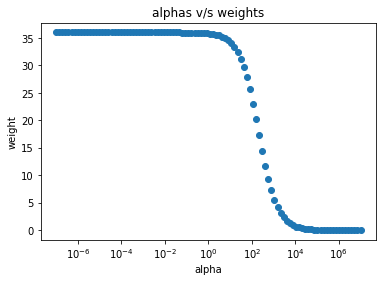

In [31]:
# Plot of coefficients vs. alphas
a_weights=np.array([i for i in alpha_weights[:,0]])
plt.scatter(alphas, a_weights)
plt.title('alphas v/s weights')
plt.xlabel('alpha')
plt.ylabel('weight')
plt.xscale("log")
plt.show()

Why are the values of the weights largest on the left? Do they all change monotonically? 

Yes with log scaling on x-axis the change is monotonic.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$s should be close to the test-set MSE of the unregularized solution, i.e. 708.

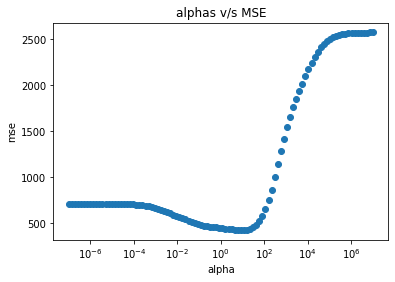

In [32]:
# Plot of MSE  vs. alphas
plt.scatter(alphas, alpha_mse)
plt.title('alphas v/s MSE')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.xscale("log")
plt.show()

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

10^7 gives minimum MSE. For smaller values of alpha the model performed similar to unregularized models whereas for larger values of alpha it showed significant accuracy improvement. The curve reaches highest value on left due to extremely smaller values of alpha which causes under fitting and more deviation from the predicted output, hence greater MSE. 

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [33]:
from sklearn.linear_model import Ridge

In [38]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    X_test=Normalize(X_test)
    X_train = Normalize(X_train)
    rreg = Ridge(alpha=alpha)
    rreg.fit(X_train, y_train)
    weights = rreg.coef_
    y_pred=rreg.predict(np.array(X_test))
    print(mean_squared_error(y_pred,y_test))
    print(r2_score(y_pred,y_test))
    
    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

In [39]:
# Plot of MSE  vs. alphas
alphas = np.logspace(-7, 7, 100)
alpha_mse=[]
# ---------------- INSERT CODE ----------------------
for alpha in alphas:
    weights, y_pred = ridge_regression_sklearn(X_test, X_train, y_train, alpha)
    alpha_mse.append(mean_squared_error(y_pred, y_test))

# ---------------- END CODE -------------------------

707.7951581157249
0.5566430568418044
707.7929542143116
0.556643359373767
707.7899021561877
0.5566437783326231
707.7856755939799
0.55664435851378
707.7798226391033
0.5566451619484696
707.771717654533
0.556646274511362
707.7604944944359
0.5566478150906984
707.7449542280369
0.5566499482473923
707.7234375942058
0.556652901710049
707.6936488130176
0.5566569905552415
707.6524126120131
0.556662650517478
707.5953394062584
0.5566704838974786
707.5163651042765
0.5566813226104796
707.4071203200825
0.5566963145591244
707.2560692050697
0.5567170414135999
707.04734052357
0.5567456782652592
706.7591537230294
0.5567852081298588
706.3617239663305
0.5568397065951705
705.8145198644035
0.5569147127266836
705.0627616444315
0.557017699397538
704.0331154031044
0.5571586450981358
702.6287134004695
0.5573506822635688
700.7239931030812
0.5576107424732756
698.1605097001309
0.5579600210954281
694.7459381249358
0.5584239311126977
690.2599072623892
0.5590310201366937
684.4716584315279
0.5598101686331911
677.1745222

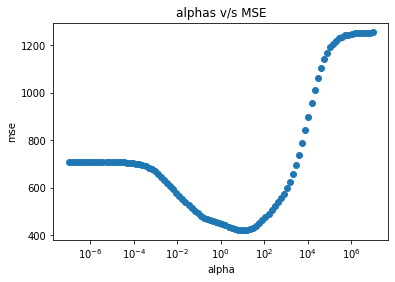

In [40]:
plt.scatter(alphas, alpha_mse)
plt.title('alphas v/s MSE')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.xscale("log")
plt.show()

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------
    for i in range(len(alphas)):
        X=Normalize(X)
        rreg = Ridge(alpha=alphas[i])
        scores = np.array(cross_val_score(rreg, X, y, cv=n_folds))
        cv_results_mse[:,i] = scores
        


    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [43]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

We plot the MSE trace for each fold separately:

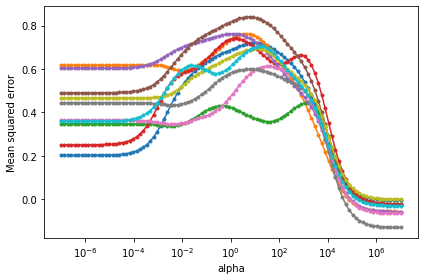

In [44]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

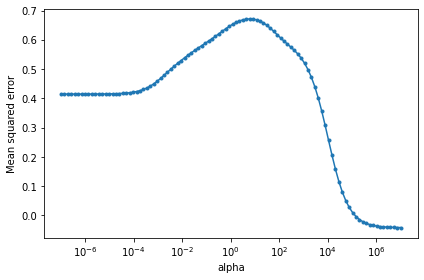

In [45]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

values between 10^-7 to around 10^-5 is optimal with least MSE. No it is not similar, instead it is almost opposite to the one found for test-set. They differ as in the above graph maxima lies around 10^2 and minima around 10^-7 whereas in the test-set for MSE minima lies around 10^2 and maxima around 10^8, hence they differ strongly.

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [46]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

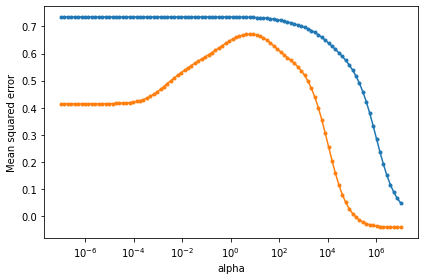

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very left:

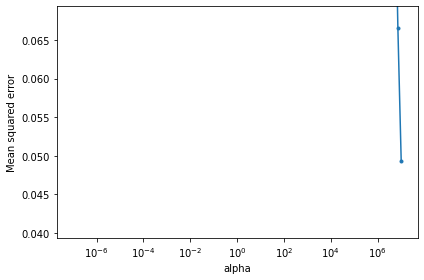

In [48]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

Optimal value is 10^7.